In [18]:
pattern = ''  # Initialize the pattern variable

import csv

CSV_FILE_PATH = './input/annotations.csv'
with open(CSV_FILE_PATH, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        label = row[1]
        if label == 'linear':
            pattern += 'L'
        elif label == 'parabolic':
            pattern += 'P'
        elif label == 'collision':
            pattern += 'C'
#print(len(pattern))
#print(pattern)

In [19]:
group_size = 30
classifications = []

# Classify each group
for i in range(len(pattern) - group_size + 1):
    group = pattern[i:i + group_size]
    l_count = group.count('L')
    c_count = group.count('C')
    p_count = group.count('P')

    if l_count == group_size:
        classifications.append('L')
    elif p_count == group_size:
        classifications.append('P')
    elif l_count == group_size - 1 and c_count == 1:
        classifications.append('L')
    elif p_count == group_size - 1 and c_count == 1:
        classifications.append('P')
    elif l_count >= 1 and c_count >= 1 and p_count >= 1:
        if 'L' in group[:group_size - 2] and 'P' in group[group_size - 1:]:
            classifications.append('LP')
        else:
            classifications.append('PL')
    elif l_count >= 28 and c_count >= 1 and p_count == 0:
        classifications.append('LL')
    elif p_count >= 1 + c_count >= 1 + l_count >= 1:
        classifications.append('PL')
    elif c_count == group_size:
        classifications.append('PP')
    else:
        classifications.append('U')

    #print(group, classifications[i])

#print(len(classifications))

## Feature extract

In [31]:
from btc_feature_extractor import btc_extract_features

# Define your input and result file paths
input_file_path = './input/original_coordinates.csv'
result_file_path = './working/features.csv'

# Call the btc_extract_feature function
btc_extract_features(input_file_path, result_file_path)


## Train model

In [32]:
X = []

# Load data from the result_file_path
with open(result_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)  # Skip the header row

    for row in csv_reader:
        x_data = [float(row[0]), float(row[1]), float(row[2]), float(row[3])]
        X.append(x_data)


In [33]:
y = []
for i in range(len(classifications)):
    y.append(classifications[i])
    
y = y[:len(X)]

print(len(y))
print(y)

5949
['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',

## Build scaler

In [34]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

### Save scaler

In [35]:
import joblib
from sklearn.preprocessing import StandardScaler

# 저장할 파일 이름
normalizer_filename = 'btc_saved_scaler.pkl'

# StandardScaler 객체를 생성하고 훈련 데이터에 맞게 fit_transform을 수행합니다.
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)

# 훈련 데이터에 대한 정규화 매개변수를 저장합니다.
joblib.dump((normalizer.mean_, normalizer.scale_), normalizer_filename)

['btc_saved_scaler.pkl']

In [36]:
import joblib
from sklearn.preprocessing import StandardScaler

# 저장된 정규화 매개변수를 로드합니다.
normalizer_filename = 'btc_saved_scaler.pkl'
loaded_mean, loaded_scale = joblib.load(normalizer_filename)

# 로드한 매개변수를 사용하여 StandardScaler 객체를 생성합니다.
loaded_normalizer = StandardScaler()
loaded_normalizer.mean_ = loaded_mean
loaded_normalizer.scale_ = loaded_scale

# 테스트 데이터에 로드한 정규화 매개변수를 적용하여 정규화합니다.
X_test = loaded_normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (4164, 4)
Test set dimension is (1785, 4)


### Save normalized X_test features

In [20]:
import csv

# Define the file path for the normalized_features.csv file
normalized_features_file_path = 'normalized_Xtest_features.csv'

# Write the X_test data to the normalized_features.csv file
with open(normalized_features_file_path, 'w', newline='') as normalized_features_file:
    csv_writer = csv.writer(normalized_features_file)
    
    # Write the header row
    csv_writer.writerow(['Start Acceleration Y', 'End Acceleration Y', 'Max Jerk Y', 'Min Jerk Y'])
    
    # Write the data
    for x_data in X_test:
        csv_writer.writerow(x_data)


## Build Predictor model

In [37]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

## Predict model

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import recall_score, precision_score

# Train set에 대한 성능
y_pred = clf.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = clf.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}") 

Train set에 대한 성능
정확도:0.9628


Test set에 대한 성능
정확도:0.8936


In [14]:
recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

print('Test data와 예측값에 대한 성능 체크')
print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ') 

Test data와 예측값에 대한 성능 체크
정확도:0.8936  |  민감도:0.7734  |  정밀도:0.8289


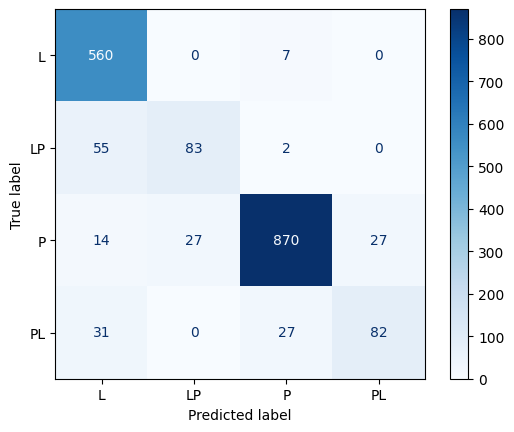

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
#disp.plot()
plt.show()

### Save Predictor

In [3]:
import joblib

# Save the trained classifier to a file
BTC_SAVED_PREDICTOR_FILEPATH = 'btc_saved_predictor.pkl'
joblib.dump(clf, BTC_SAVED_PREDICTOR_FILEPATH)

ModuleNotFoundError: No module named 'joblib'